## Part V: Comparing to real sequences
---

Today, we're about to embark on a journey into the tiny yet tremendous world that exists inside every living cell – the world of proteins. But this isn't just any journey; it's more like a detective adventure, where you'll uncover secrets hidden within the building blocks of life itself!

Imagine for a moment that you're a scientist in a vast laboratory filled with all kinds of colorful, shimmering beads. Each bead can connect to others in countless ways, creating endless combinations that dance and twist into unique shapes. These aren't ordinary beads; they are like the ones found in every creature on Earth – from the tiniest bacteria to the largest whales, and even in you and me. What we're talking about are proteins, the molecules that do most of the work in our bodies.

But here's the twist: not all combinations work. Some are perfect, keeping the machinery of life running smoothly, while others... well, they're like putting the wrong piece into a puzzle. Today, you'll become molecular detectives, exploring how these proteins can change, or 'mutate', and what happens when they do. You'll discover why some parts of a protein are like strict police officers, never changing, ensuring everything works just right, while other parts are like adventurous artists, always trying new styles.

By the end of our adventure, you'll not only understand the delicate dance of proteins but also gain insights into how scientists study them to prevent and cure diseases. So, put on your detective hats, grab your magnifying glasses, and let's dive into the microscopic world of proteins – where every discovery is a step towards solving the mysteries of life itself!

Are you ready to uncover the secrets? Let's get started on our quest to explore the fascinating world of proteins!

In [21]:
# load libraries

!pip install biopython
!pip install logomaker

from utils.utils import *
from utils.sequence_alignment_viewer import *
from utils.build_tree import *

from Bio import SeqIO
from io import StringIO
import logomaker

import requests

from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(INLINE)

In this lesson, we will be looking at sequences from a real protein, rather than the random ones that you have been making in Python. 

This gives us a chance to see how real proteins change in nature, and how this differs to what we expect to happen due to chance alone. 

In [ ]:
# read in FASTA file of aligned protein sequences using Biopython

sequences_protein = {}

# read in the FASTA file
# URL of the file you want to download
url = "https://raw.githubusercontent.com/nwheeler443/AI_in_Schools_DNA/main/Data/ENOG501RNHV.afa"

# Use requests to get the content of the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use StringIO to convert the text content into a file-like object
    file_like_object = StringIO(response.text)
    
    # Now use SeqIO to parse the file-like object
    for seq_record in SeqIO.parse(file_like_object, "fasta"):
      sequences_protein[seq_record.id] = str(seq_record.seq)[620:670]

Imagine you're an explorer in the vast and mysterious world of proteins, those tiny machines inside every living thing. Now, picture a protein as a string of colorful beads, where each color represents a different part of the protein.

Below, we give each amino acid in the protein a colour, based on its characteristics. Amino acids differ in their size, shape, and chemistry. These differences help proteins take on the right shape and perform the right function. 

In [ ]:
# view the protein sequences

sampled_keys = random.sample(list(sequences_protein.keys()), 20)
downsampled_dict = {key: sequences_protein[key] for key in sampled_keys}

p = view_alignment(downsampled_dict, language='protein', plot_width=800)
pn.pane.Bokeh(p)

BokehModel(combine_events=True, render_bundle={'docs_json': {'988ef16c-d7ad-4f67-a7b6-17f142188e43': {'version…

In [ ]:
# define the colours of our 'beads' - the different amino acids in a protein

clrs =  {'A':'red','L':'red','I':'red','V':'red','M':'red','F':'red','Y':'red','W':'red', # hydrophobic
                 'H':'blue','K':'blue','R':'blue', # basic
                 'D':'green','E':'green', # acidic
                 'S':'orange','T':'orange','N':'orange','Q':'orange', # polar
                 'C':'pink','U':'pink','G':'pink','P':'pink', # special cases
                 '-':'white', '*':'black'}

Next, we will visualise a part of the protein to see how it varies in nature. Compare this to your visualisation of the simulated sequences.

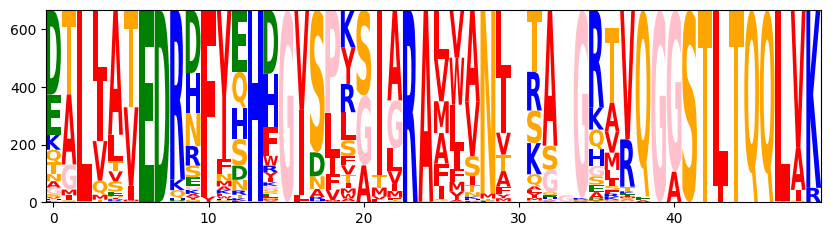

In [ ]:
seqs = list(sequences_protein.values())
ars_df = logomaker.alignment_to_matrix(seqs)
ars_logo = logomaker.Logo(ars_df, color_scheme=clrs)

Imagine you're an explorer in the vast and mysterious world of proteins, those tiny machines inside every living thing. Now, picture a protein as a string of colorful beads, where each color represents a different part of the protein.

In our exploration, we find that some parts of this beaded string are super vibrant, with lots of different colors – these areas love to change and try out new beads. But then, there are parts of the string where all the beads are the same color, as if they are saying, "We're good just the way we are!"

Why do you think this happens? Well, it turns out that some parts of the protein need to stay exactly the same to keep the protein working properly, just like how certain parts of a car engine need to be just right for the car to run. These parts are the single-colored bead sections – they can't change without causing trouble.

But the world of proteins is full of surprises and changes, which we call 'mutations'. These are like swapping out beads on our string for new ones. Most times, the protein can handle a few new beads without any problems, especially in the colorful, changeable sections. However, if too many of the wrong beads get into the single-color sections, our protein might stop working properly, just like if the wrong part gets put into a car engine.

By looking at these patterns – where the beads (or parts of the protein) change and where they stay the same – scientists can play detective. They can figure out which changes are okay and which might cause the protein to "break". It's like solving a puzzle from nature to understand how life works and how we can fix things when they go wrong.

So, next time you think about proteins, remember the colorful beads and how their patterns help scientists discover the secrets of life!